In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data science formalism

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In supervised machine learning, you have some data with the corresponding label for these data. Let's check what are those data.

In [4]:
X_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [8]:
X_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
y = pd.Series(iris.target, name='target')
y = y.apply(lambda x: iris.target_names[x])

In [9]:
y.tail()

145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, dtype: object

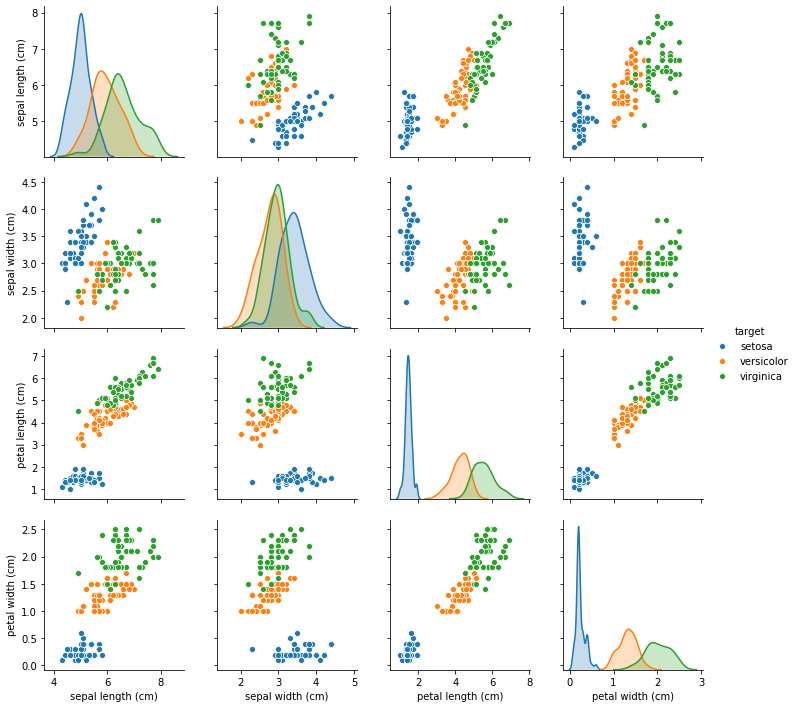

In [10]:
sns.pairplot(data=pd.concat([X_df, y], axis=1), hue='target')

I created a pandas dataframe and a pandas series from the original data. We should check what type of data were these original data.

In [11]:
type(iris.data)

numpy.ndarray

In [12]:
type(iris.target)

numpy.ndarray

So these variables are NumPy array. NumPy is a package which allows to work with numeric data efficiently in Python. It is the main used package in scikit-learn to handle data. Let's give an example. We will train a classifier which will predict the class of the majority nearest neighbors.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

Create the classifier.

In [14]:
classifier = KNeighborsClassifier()

Train the classifier.

In [15]:
classifier.fit(iris.data, iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Let say that we got an iris flower and took the measurements of the petal and sepal and organise it the same way as before.

In [16]:
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])

Our classifier will be able to tell use which class this flower should be.

In [17]:
classifier.predict(new_flower)

array([0])

Be aware that this classifier could have been directly the dataframe or series because all data are already numeric and scikit-learn could have manage to convert them into NumPy arrays internally.

In [18]:
classifier.fit(X_df, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
classifier.predict(new_flower)

array(['setosa'], dtype=object)

## 2. Difference between NumPy array and a pandas dataframe

We can quickly check what is the difference between a NumPy array and a Pandas dataframe by printing them.

In [20]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


So the dataframe got an index and some column names. However, they represent the same data.

In [22]:
X_df.shape

(150, 4)

In [23]:
iris.data.shape

(150, 4)

Anothe major difference is about the data types:

In [24]:
X_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [25]:
iris.data.dtype

dtype('float64')

A dataframe as a data types for each column while a single one for the numpy array. Note that we can always get a numpy array from a dataframe.

In [27]:
X_df.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

We can select some values from an array similarly to the selection by position of Pandas.

In [28]:
iris.data[0, :]

array([5.1, 3.5, 1.4, 0.2])

In [29]:
iris.data[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [30]:
iris.target[0]

0

## 2. Quick numerical analysis

We already saw that we could use Pandas not make quick numerical analysis.

In [ ]:
X_df.mean()

However, you don't want to always convert your data to a dataframe to compute simple stats. Let's compute the `mean` as we would do in Pandas. What this mean value is representing?

In [ ]:
iris.data.mean()

In [ ]:
X_df.mean().mean()

So we can use the `axis` keyword to further explain how to compute a statistic.

In [ ]:
iris.data.mean(axis=0)

In [ ]:
iris.data.mean(axis=1)

## 3. Particular example of image classification

A very common use case in classification is to classifify image. I want to present this case since it is not straightforward to know how to represent our data.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
digits.keys()

So we have some image data. We can first check the shape of this numpy array.

In [ ]:
digits.images.shape

And we can plot the first sample of this array which is an image.

In [ ]:
plt.imshow(digits.images[0])

However, we saw that scikit-learn require 2D data array. Let's check how the data were stored.

In [ ]:
digits.data.shape

In [ ]:
digits.data[0]

In [ ]:
digits.target.shape

In [ ]:
n_images, height, width = digits.images.shape
print(n_images, height, width)

So we can easily go from a 3D array to a 2D array and vice-versa.

In [ ]:
plt.imshow(digits.data[0].reshape((height, width)))

Now, we can train a classifier and see how it behave.

In [ ]:
classifier.fit(digits.data, digits.target)

In [ ]:
new_example = digits.data[0]

In [ ]:
classifier.predict(new_example)

We get a nasty error because we provide a 1D vector to the classifier. Scikit-learn requires a 2D array such that we know the difference between a sample and a feature.

In [ ]:
new_example.shape

In [ ]:
new_example.reshape(-1, 1).shape

In [ ]:
new_example[:, np.newaxis].shape

In [ ]:
new_example.reshape(1, -1).shape

In [ ]:
new_example[np.newaxis, :].shape

Now that we know how to specify that our vector was a single sample, we can try to predict again.

In [ ]:
classifier.predict(new_example[np.newaxis, :])

What if I got 2 single samples to classify and that I want to join them to make the predictions.

In [ ]:
another_example = digits.data[1]

In [ ]:
datasets = np.vstack([new_example, another_example])

In [ ]:
datasets.shape

In [ ]:
datasets

In [ ]:
classifier.predict(datasets)